In [13]:
from model import *
from data_128 import *
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
from model import *
from patchify import patchify, unpatchify
import tifffile as tiff

### Load DHM Model

In [14]:
model = load_model('DHM_model.hdf5')

(799, 799)


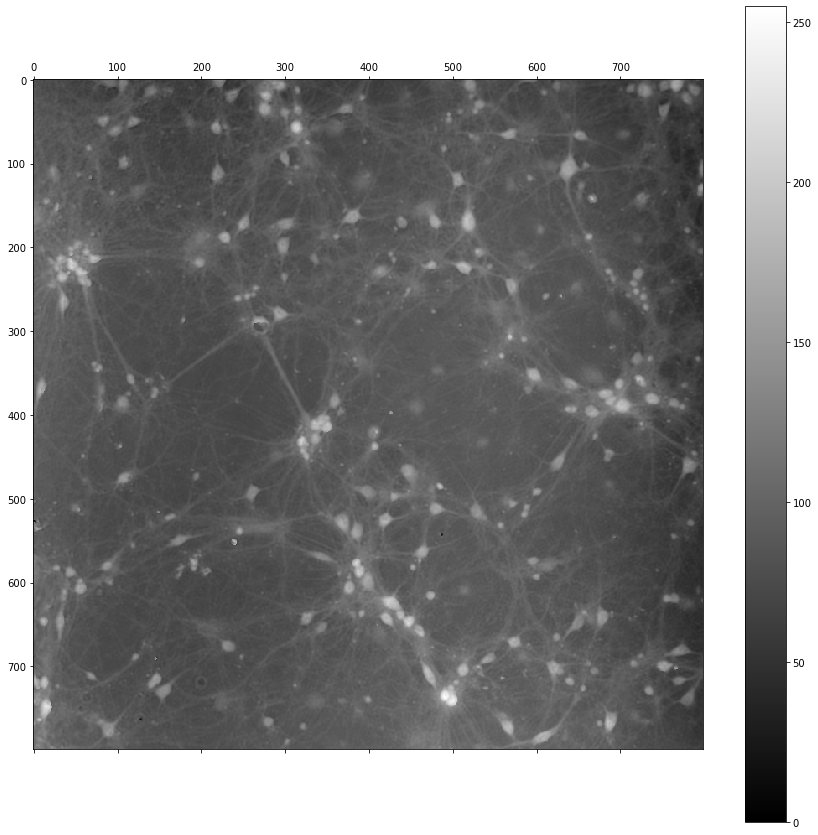

In [15]:
DHM_img = io.imread('/Users/behnazyazdani/DeepNeurite/data/DHM/img_gene/DHM_img/RatNeuron_3_666_Bw_2_5X.tif')
print(DHM_img.shape)
plt.figure(figsize=(15,15))
plt.matshow(DHM_img, cmap='gray', fignum=0)
plt.colorbar()
plt.show()

In [16]:
patches = patchify (DHM_img, (128,128), step=61) # split image into 12*12 small 128*128 patches.
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = patches[i,j,:,:]
        io.imsave('data/DHM_prediction/patch_DHM/'+'RatNeuron_3_666_Bw_2_5X_'+str(i)+'_'+str(j)+".tif",single_patch_img)

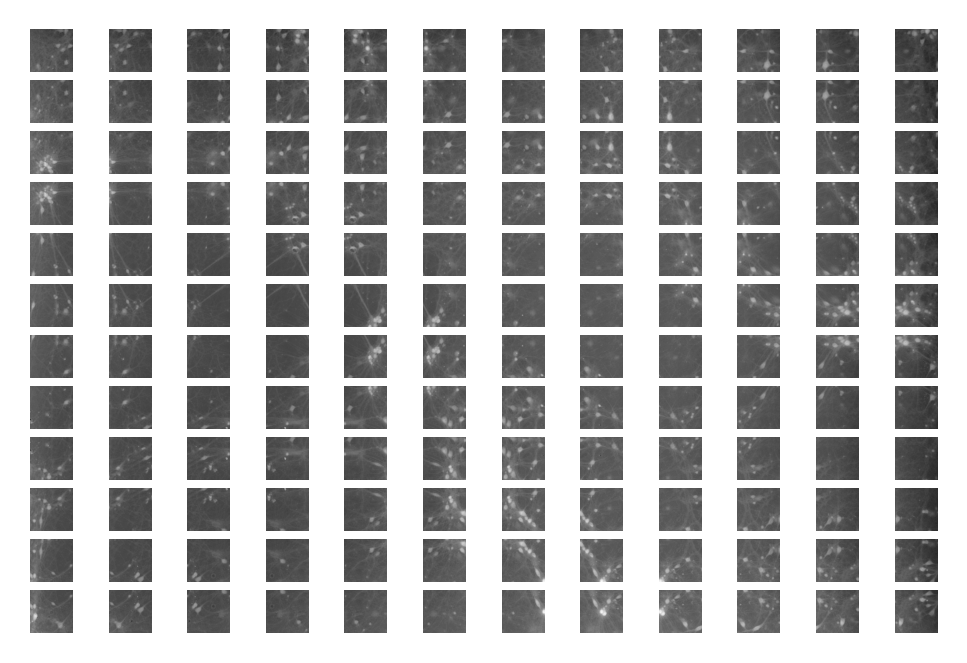

In [17]:
# Show patches in a 10x10 grid
dpi = 300
plot_width, plot_height = 1200, 800
width_inches, height_inches = plot_width/dpi, plot_height/dpi

fig, ax = plt.subplots(patches.shape[0], patches.shape[0], figsize=(width_inches, height_inches), dpi=dpi, facecolor='w', edgecolor='k', frameon=False)

for i in range(patches.shape[0]):
    for j in range(patches.shape[0]):
        im = patches[i,j,:,:]
        ax[i, j].axis('off')
        ax[i, j].imshow(im,cmap='gray', vmin=0,vmax=255)

## Prediction

In [19]:
# Predict the test data
NUM_TEST_IMAGES= patches.shape[0]*patches.shape[0]
test_path="data/DHM_prediction/patch_DHM"
file_list = [f for f in os.listdir(test_path) if f[-3:]=="tif"]
#print(file_list)   

testGene = testGenerator(test_path,file_list)
results = model.predict_generator(testGene,NUM_TEST_IMAGES,verbose=1)
saveResult("data/DHM_prediction/patch_DHM_prediction",results,file_list)

144/144 [==============================] - 4s 27ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [20]:
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = io.imread('data/DHM_prediction/patch_DHM_prediction/'+'RatNeuron_3_666_Bw_2_5X_' + str(i) + '_' + str(j) + '_' +'predict'+'.png')  # Read a patch image.
        if single_patch_img is None:
            raise Exception("Could not read the image") 
        patches[i, j,:, :] = single_patch_img.copy()  # Copy single path image to patches

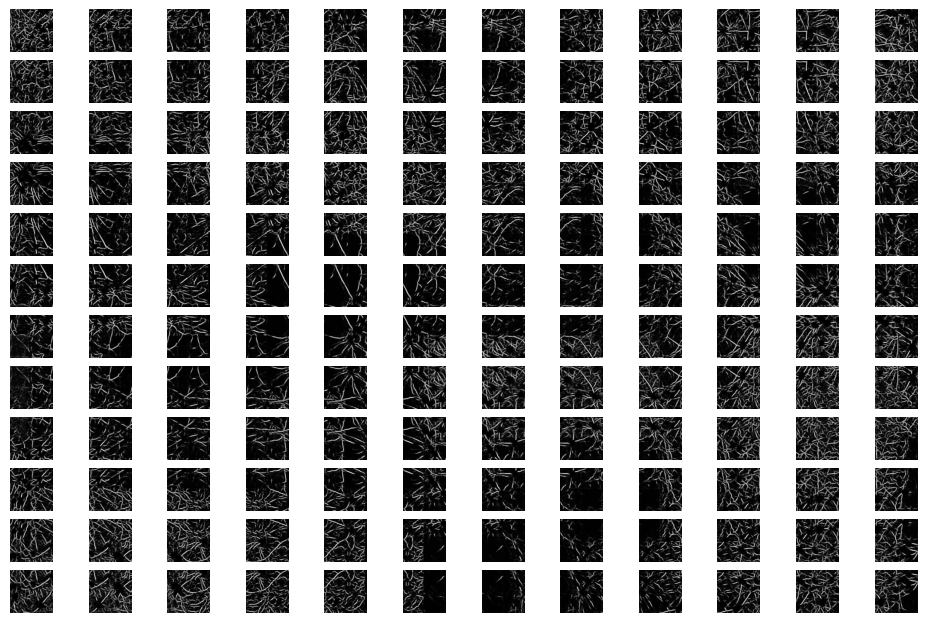

In [21]:
# Show patches in a 10x10 grid
dpi = 100
plot_width, plot_height = 1200, 800
width_inches, height_inches = plot_width/dpi, plot_height/dpi

fig, ax = plt.subplots(patches.shape[0], patches.shape[0], figsize=(width_inches, height_inches), dpi=dpi, facecolor='w', edgecolor='k', frameon=False)

for i in range(patches.shape[0]):
    for j in range(patches.shape[0]):
        im = patches[i,j,:,:]
        ax[i, j].axis('off')
        ax[i, j].imshow(im,cmap='gray')

In [22]:
assert patches.shape == (12, 12, 128, 128)
reconstructed_image = unpatchify(patches, DHM_img.shape)
assert (reconstructed_image == DHM_img).all()

In [23]:
io.imsave('data/DHM_prediction/unpatch_DHM/'+'U_DHM_RatNeuron_3_666_Bw_2_5X'+".tif",reconstructed_image)

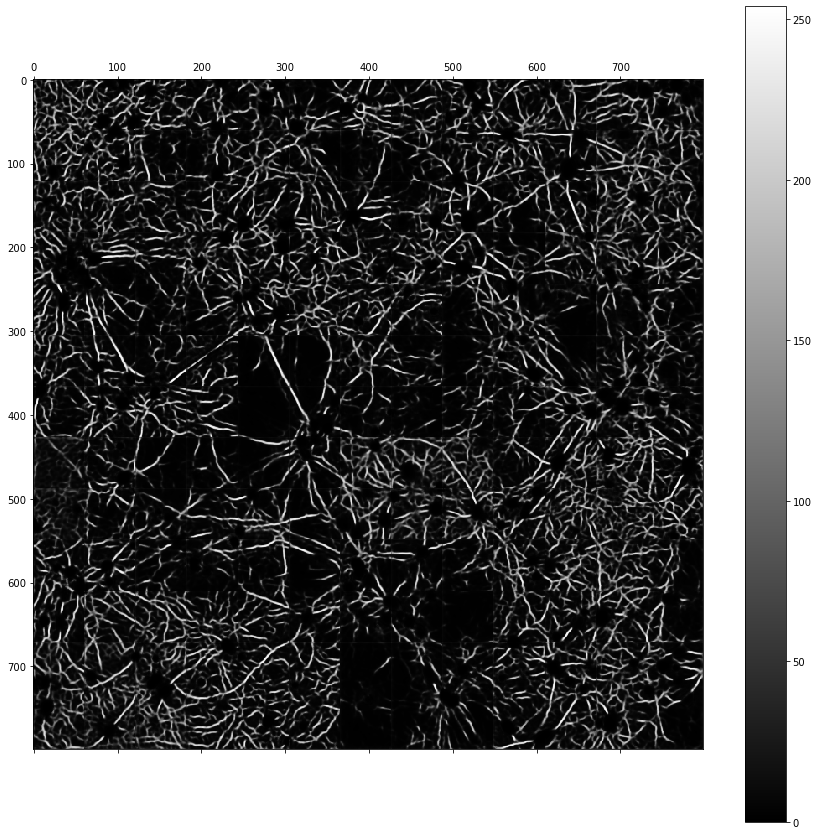

In [24]:
plt.figure(figsize=(15,15))
plt.matshow(reconstructed_image, cmap='gray', fignum=0)
plt.colorbar()
plt.show()